# This section presents the implemention and the analysis of the linear regression algorithm. 

## In the first part:
1. we import the necessary libraries and datasets, the california housing price.
2. we display the first few rows of the dataset and descriptive statistics to understand the basic structure of the dataset. 
3. we visualize the distribution of the target variable by plotting the distribution of the median house price

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

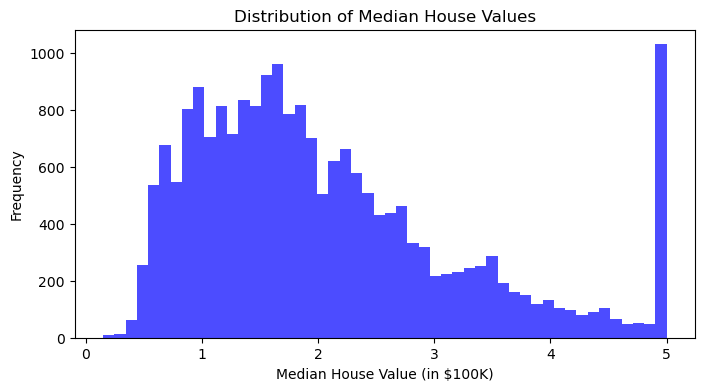

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset

california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target


# Show the first few rows of the dataset to understand its structure and the corresponding descriptive statistics

print(data.head())
print(data.describe())


# Plotting the distribution of the median house values

plt.figure(figsize=(8, 4))
plt.hist(data['MedHouseVal'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value (in $100K)')
plt.ylabel('Frequency')
plt.show()


## In the second part:

1. we partition the dataset into the features and the target data, the MedHouseVal.
2. we split the dataset into the training set and the test set.
3. we train a linear regression model on the training set.
4. we show the coefficients and intercepts of the model to help understand the impact of each feature on the prediction target.


In [3]:
# Import library for Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Select features and target variable and split the dataset into training and testing sets

X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model and train the model on the training set

model = LinearRegression()
model.fit(X_train, y_train)


# Print the coefficients of the model

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706064114


## In the third part:
1. we use the trained model to make predictions on the test set.
2. we evaluate model performance using two general metrics, mean squared error and R². 
3. we show the scatter plot of the relationship between the predicted and actual values, along with an ideal fit line to graphically analyze the model's prediction accuracy and bias.

Mean Squared Error: 0.5558915986952441
R^2 Score: 0.575787706032451


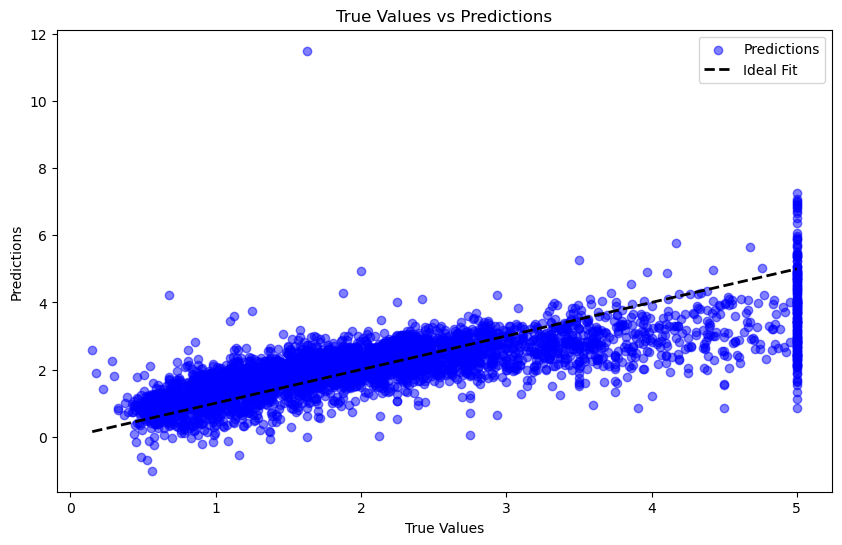

In [4]:
# Import libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score


# Predict on the test set

y_pred = model.predict(X_test)


# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting the results

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()


## Analysis part:
1. we further analyze the linear regression implementation. For example, we control the parameter "fit_intercept=False" to remove the intercept while training.
2. we train the model and evaluate model performance using two general metrics, mean squared error and R².
3. we found that the model trained without intercept will cause an increase in the MSE to lower the prediction performance.

Coefficients: [ 5.22530119e-01  1.58926227e-02 -1.93889692e-01  9.75497703e-01
  9.22146146e-06 -4.40393658e-03 -6.21649101e-02 -1.49848816e-02]
Intercept: 0.0
Mean Squared Error: 0.6294468701964698
R^2 Score: 0.5196561679229008


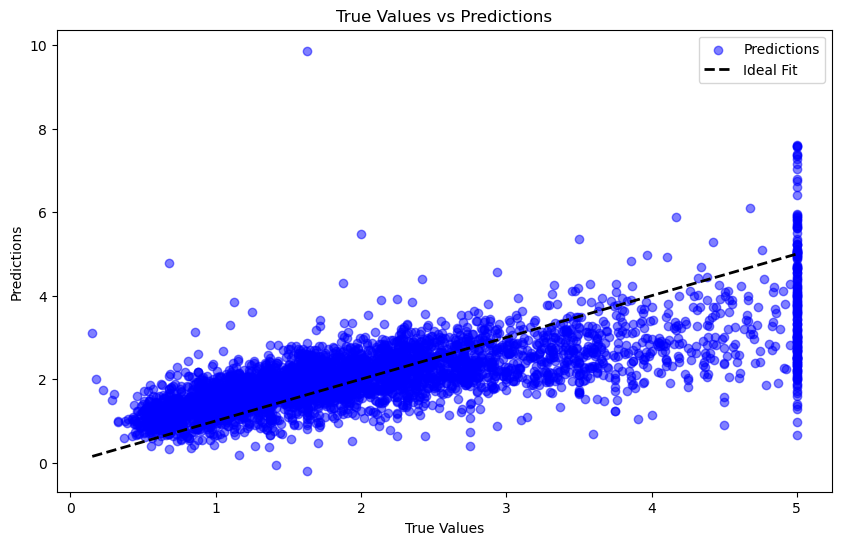

In [5]:
# Import library for Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a linear regression model and train the model on the training set

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)



print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()